# Экстраполяция населения Бразилии


In [12]:
x_data = np.array([1955, 1965, 1975, 1985, 1995, 2005, 2015])
y_data = np.array([62101388, 83817583, 107619565, 135515595, 161735073, 184688101, 201675532])

# Данные взяты с https://www.worldometers.info/world-population/brazil-population/

# D 2024 году население Бразилии составляет 211,998,573 человек

## Полиномиальная интерполяция по Ньютону

Экстраполированное население на 2024 год: 191166070


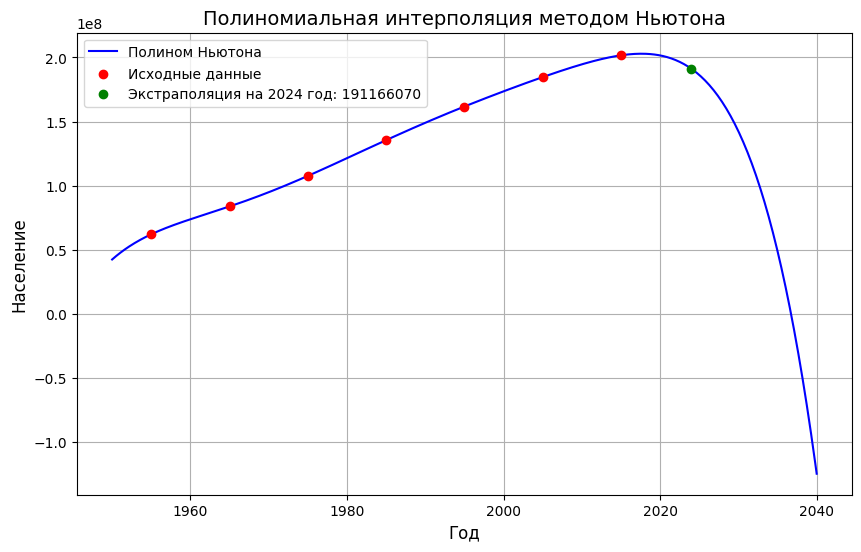

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для вычисления разделенных разностей
def divided_differences(x, y):
    n = len(x)
    coef = np.zeros([n, n]) 
    coef[:, 0] = y          

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x[i + j] - x[i])
    
    return coef[0, :]

# Функция для построения полинома Ньютона
def newton_polynomial(x_data, coef, x):
    n = len(coef)
    result = coef[0]
    product_term = 1.0

    for i in range(1, n):
        product_term *= (x - x_data[i - 1])
        result += coef[i] * product_term
    
    return result

# Вычисление коэффициентов разделенных разностей
coefficients = divided_differences(x_data, y_data)

# Экстраполяция для 2030 года
pop_2024 = newton_polynomial(x_data, coefficients, 2024)
print(f"Экстраполированное население на 2024 год: {pop_2024:.0f}")

x_plot = np.linspace(1950, 2040, 500)
y_plot = [newton_polynomial(x_data, coefficients, x) for x in x_plot]

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label="Полином Ньютона", color='blue')
plt.scatter(x_data, y_data, color='red', label="Исходные данные", zorder=5)
plt.scatter([2024], [pop_2024], color='green', label=f"Экстраполяция на 2024 год: {pop_2024:.0f}", zorder=5)

plt.title("Полиномиальная интерполяция методом Ньютона", fontsize=14)
plt.xlabel("Год", fontsize=12)
plt.ylabel("Население", fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()


Экстраполированное население на 2024 год: 216722337


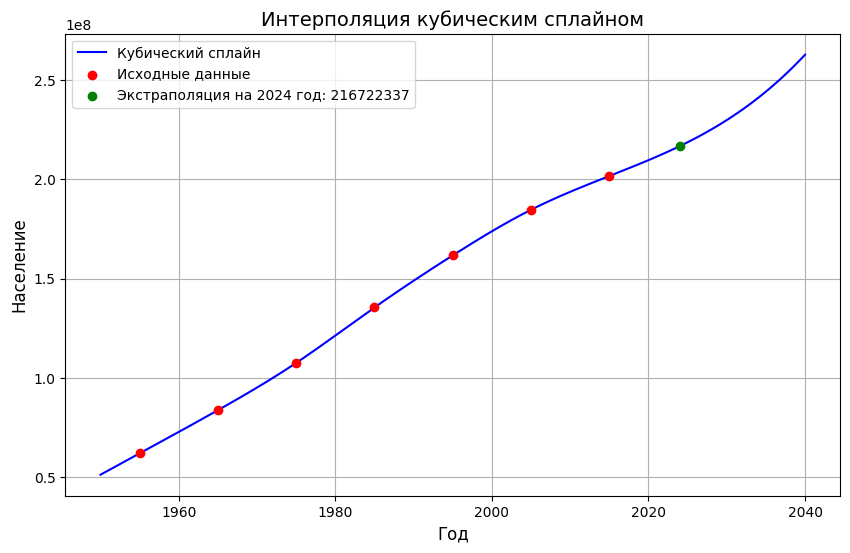

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Вычисление коэффициентов кубического сплайна
def cubic_spline(x_data, y_data):
    n = len(x_data)
    h = np.diff(x_data)
    alpha = np.zeros(n - 1)
    l = np.ones(n)
    mu = np.zeros(n - 1)
    z = np.zeros(n)
    
    for i in range(1, n - 1):
        alpha[i] = (3 * (y_data[i + 1] - y_data[i]) / h[i] - 3 * (y_data[i] - y_data[i - 1]) / h[i - 1])
    
    l[0] = 1
    mu[0] = 0
    z[0] = 0
    
    for i in range(1, n - 1):
        l[i] = 2 * (x_data[i + 1] - x_data[i - 1]) - h[i - 1] * mu[i - 1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]
    
    l[n - 1] = 1
    z[n - 1] = 0
    c = np.zeros(n)
    b = np.zeros(n - 1)
    d = np.zeros(n - 1)
    a = y_data[:-1]
    
    for j in range(n - 2, -1, -1):
        c[j] = z[j] - mu[j] * c[j + 1]
        b[j] = (y_data[j + 1] - y_data[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d[j] = (c[j + 1] - c[j]) / (3 * h[j])
    
    return a, b, c, d, x_data

# Оценка значения интерполяции
def cubic_spline_eval(x, x_data, a, b, c, d):
    i = np.searchsorted(x_data, x) - 1
    
    if i < 0:
        i = 0
    if i >= len(x_data) - 1:
        i = len(x_data) - 2

    h = x - x_data[i]
    return a[i] + b[i] * h + c[i] * h**2 + d[i] * h**3

# Вычисление коэффициентов кубического сплайна
a, b, c, d, x_data_extended = cubic_spline(x_data, y_data)

# Экстраполяция для 2024 года
pop_2024 = cubic_spline_eval(2024, x_data, a, b, c, d)
print(f"Экстраполированное население на 2024 год: {pop_2024:.0f}")

x_plot = np.linspace(1950, 2040, 500)  # Диапазон для построения графика
y_plot = [cubic_spline_eval(x, x_data, a, b, c, d) for x in x_plot]

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label="Кубический сплайн", color='blue')
plt.scatter(x_data, y_data, color='red', label="Исходные данные", zorder=5)
plt.scatter([2024], [pop_2024], color='green', label=f"Экстраполяция на 2024 год: {pop_2024:.0f}", zorder=5)

plt.title("Интерполяция кубическим сплайном", fontsize=14)
plt.xlabel("Год", fontsize=12)
plt.ylabel("Население", fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()


Экстраполированное население на 2024 год (метод наименьших квадратов): 223668909


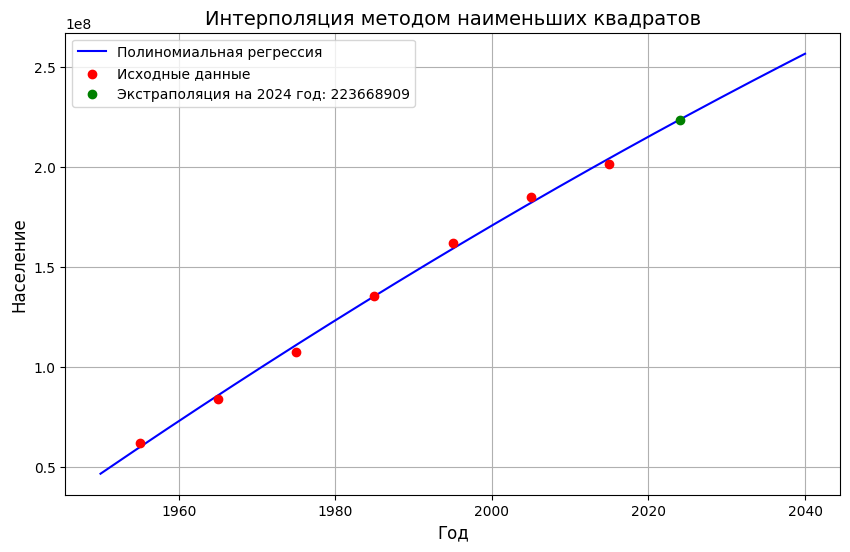

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Вычисление матрицы Вандермонда
def vandermonde_matrix(x_data, degree):
    return np.array([[x**i for i in range(degree + 1)] for x in x_data])

# Выполнение интерполяции методом наименьших квадратов
def least_squares_fit(x_data, y_data, degree):

    A = vandermonde_matrix(x_data, degree)
    
    A_T_A = np.dot(A.T, A)
    A_T_y = np.dot(A.T, y_data)
    
    coeffs = np.linalg.inv(A_T_A).dot(A_T_y)
    
    return coeffs

# Вычисление значения полинома в точке x
def least_squares_eval(x, coeffs):
    return sum(c * x**i for i, c in enumerate(coeffs))

degree = 3 # Степень полинома

# Получение коэффициентов полинома методом наименьших квадратов
coeffs = least_squares_fit(x_data, y_data, degree)

# Экстраполяция для 2024 года
pop_2024 = least_squares_eval(2024, coeffs)
print(f"Экстраполированное население на 2024 год (метод наименьших квадратов): {pop_2024:.0f}")


x_plot = np.linspace(1950, 2040, 500)
y_plot = [least_squares_eval(x, coeffs) for x in x_plot]

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label="Полиномиальная регрессия", color='blue')
plt.scatter(x_data, y_data, color='red', label="Исходные данные", zorder=5)
plt.scatter([2024], [pop_2024], color='green', label=f"Экстраполяция на 2024 год: {pop_2024:.0f}", zorder=5)

plt.title("Интерполяция методом наименьших квадратов", fontsize=14)
plt.xlabel("Год", fontsize=12)
plt.ylabel("Население", fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()


# Результаты лабораторной работы

| Метод                | Экстраполированное население (2024 год) | Ошибка экстраполяции | 
|----------------------|----------------------------------------|----------------------|
| Полиномиальная интерполяция по Ньютона | 191,166,070                           | 20,832,503           |
| Кубический сплайн    | 216,722,337                           | 4,723,236            |
| Метод наименьших квадратов (МНК) | 223,668,909                           | 11,670,336           |
| Реальное значение    | 211,998,573                           | —                    |




## Выводы:
- **Полиномиальная интерполяция по Ньютона** дала наибольшую ошибку в экстраполяции, что указывает на возможную нестабильность метода при экстраполяции за пределы данных. Я думаю, это связано с определенным характером полиномиальной интерполяции. В данном случае, число точек n=7, что приводит к полиному шестой степени. Он точно проходит через все заданные точки, но вне диапазона данных его поведение может стать нестабильным. 

- **Кубический сплайн** показал наиболее точный результат, с ошибкой всего 4,7 млн, что делает его предпочтительным методом для данной задачи.

- **Метод наименьших квадратов (МНК)** продемонстрировал приемлемый результат с ошибкой около 11,7 млн, что также является хорошим вариантом, хотя и уступает сплайну.